In [1]:
from context import bowman
import triangulation as trin
import rational_ht_application
import triangle
from geom_equiv import gen_geom_equivs
import sage.all
from sage.all import *

Below are tests for plotting constraints.

In [2]:
Y = trin.Triangulation.ronen_l(44)
X = rational_ht_application.bicuspid_segments(Y)
#Y.plot().show()
constraints_dict = rational_ht_application.segments_for_plotting(X) # get dictionary of triangles and constraints
Z = Y.plot_constraints(constraints_dict) # get triangulation with marked segments (not transformed segmetns)
#Z.plot()

Completed triangulation.


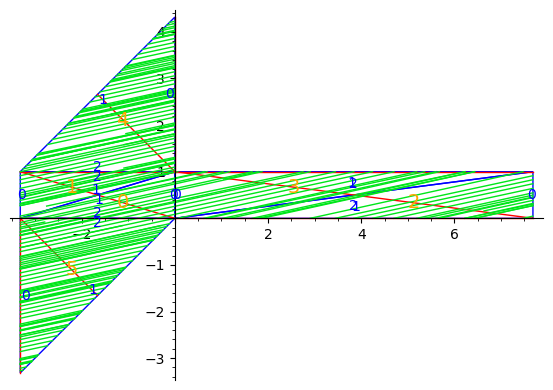

In [3]:
F = Y.generators_veech
veech_elem = F.gens[12] # get veech element
new_triangulation = Z.main_constraint_plotter(veech_elem) # get new triangulation with transformed segments
new_triangulation.plot()

## Directional Triangulation code demo
Test directional triangulation code.

In [ ]:
k = QuadraticField(5)
sqrt5 = k.gen()
phi = (1+sqrt5)/2
d = vector([0,1])
X = trin.Triangulation.mcmullen_s(phi)
Y, cyls = X.make_directional_triangulation(d)
print("The cylinders are: ", cyls)
Y.plot()

In [ ]:
X = trin.Triangulation.ronen_l(44)
d = vector([1, 1])
Y, cyls = X.make_directional_triangulation(d)
print(cyls)
Y.plot()

In [ ]:
X = trin.Triangulation.regular_octagon()
k = QuadraticField(2)
sqrt2 = k.gen()
d = vector([0, 1])
d1=vector([1 / sqrt2, 1 / sqrt2])
d2 = vector([-1 -1 / sqrt2, -1 / sqrt2])
Y, cyls = X.make_directional_triangulation(d)
print(cyls)
print(X.is_delaunay)
Y.plot()

In [ ]:
X = trin.Triangulation.mcmullen_l(2, 2)
d = vector([2, 2])
Y, cyls = X.make_directional_triangulation(d)
print(cyls)
print(X.is_delaunay)
Y.plot()

In [ ]:
    # def main_constraint_plotter(self, segment_triangulation, veech_elem):
    #     """
    #     segment_triangulation   := a triangulation with marked segments
    #     veech_elem              := global veech element for triangulation
    #     This function returns a new triangulation with transformed segments
    #     under the veech element.
    #     """
    #     new_pts_info = []
    #     tris = segment_triangulation.triangles
    #     for i, tri in enumerate(tris):
    #         lines_marked = tri.lines_marked
    #         base_coords = [j[0] for j in lines_marked]
    #         dir_coords = [j[1] for j in lines_marked]
    #         # use these to make the vectors
    #         vectors_list = [Triangulation.bary_coords_vec(line_marked[0], line_marked[1], tri) for line_marked in lines_marked]
    #         transformed_vectors = [veech_elem * j for j in vectors_list]
    #         mp_info = []
    #         for k, coord in enumerate(base_coords):
    #             new_triangulation, new_tri_indx, new_coord = self.track_marked_point(coord, i, veech_elem)
    #             real_tri_indx = self.geom_equiv_relabelling(new_triangulation, new_tri_indx) #get index of triangle in original
    #             mp_info.append((new_coord, real_tri_indx, transformed_vectors[k]))
    #         new_pts_info.append(mp_info)
    #     transfromed_plot_triangulation = self.plot_transformed_constraints(new_pts_info)
    #     return transfromed_plot_triangulation